## Subsetting and retrieval of global sealevel/ssh observation data 

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import xarray as xr
import dfm_tools as dfmt


To get an overview of the largest publicly available global sealevel observation datasets, we use `dfmt.ssh_catalog_subset()` with the `source` argument. For IOC and GESLA3 we also subset to highlight where they add significantly to the global spatial spatial coverage.

In [2]:
# ssc_catalog_gpd = dfmt.ssh_catalog_subset(source='ssc') # no data, only station locations
gesla_catalog_gpd = dfmt.ssh_catalog_subset(source='gesla3') # requires p-drive connection or download yourself
ioc_catalog_gpd = dfmt.ssh_catalog_subset(source='ioc')
cmems_list_gpd = dfmt.ssh_catalog_subset(source='cmems')
uhslc_json_rqds = dfmt.ssh_catalog_subset(source='uhslc-rqds')
uhslc_json_fast = dfmt.ssh_catalog_subset(source='uhslc-fast')
psmsl_gnssir_gpd = dfmt.ssh_catalog_subset(source='psmsl-gnssir')
ddl_gpd = dfmt.ssh_catalog_subset(source='ddl')

# subsetting gesla
bool_ndays = gesla_catalog_gpd["time_ndays"] > 365
bool_country = gesla_catalog_gpd['country'].isin(['CAN','GRL'])
bool_contrib = gesla_catalog_gpd['contributor_abbreviated'].isin(['MEDS',"GLOSS"])
gesla_catalog_gpd_sel = gesla_catalog_gpd.loc[bool_country & bool_contrib & bool_ndays]

# subsetting ioc
bool_ndays = ioc_catalog_gpd["time_ndays"] > 365
bool_country = ioc_catalog_gpd['country'].isin(['RUS','IND']) #,'TUR','ISR','CYP','KRS','HRV','HEL'])
ioc_catalog_gpd_sel = ioc_catalog_gpd.loc[bool_ndays & bool_country]


retrieving DDL catalog
                                  Naam    Code
Locatie_MessageID                             
11003                     Platform A12     A12
7292                      A12 platform     A12
11320                           Aadorp    AADP
8295                            Aadorp    AADP
10518                             Bath    BATH
13615                             Bath    BATH
10968                   Platform D15-A     D15
6876                      D15 platform     D15
14714                             Echt    ECHT
12498                             Echt    ECHT
22906                          Eemdijk   EEMDK
11124                          Eemdijk   EEMDK
19097                           IJgeul    IJGL
9811                            IJgeul    IJGL
10982                      Platform J6      J6
5377                       J6 platform      J6
11630                           Lobith    LOBH
12817                     Lobith Haven    LOBH
252970329                    Maasslui

>> reading coastlines: 2.68 sec


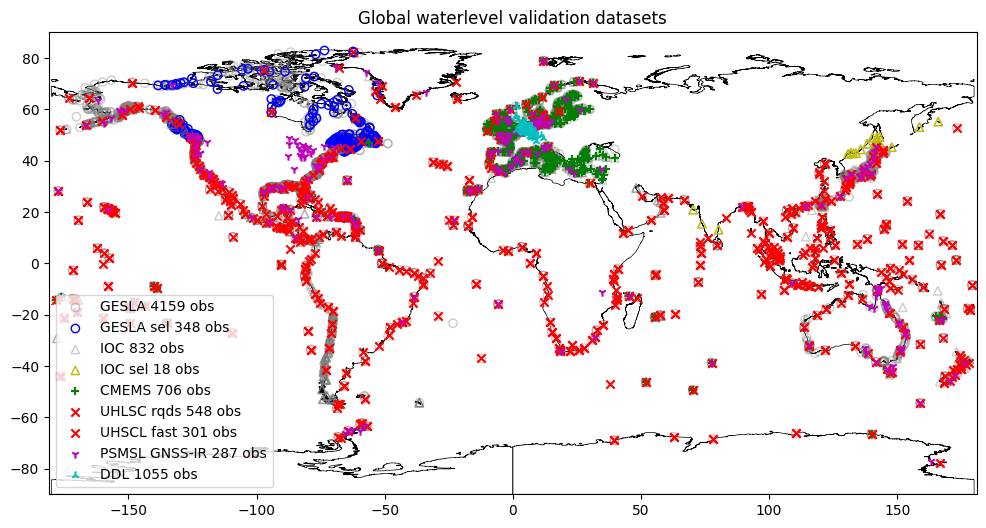

In [3]:
# plot stations
fig,ax = plt.subplots(figsize=(14,6))
gesla_catalog_gpd.geometry.plot(ax=ax, marker="o", color="grey", facecolor="none", label=f"GESLA {len(gesla_catalog_gpd)} obs", alpha=0.4)
gesla_catalog_gpd_sel.geometry.plot(ax=ax, marker="o", color="b", facecolor="none", label=f"GESLA sel {len(gesla_catalog_gpd_sel)} obs")
ioc_catalog_gpd.geometry.plot(ax=ax, marker="^", color="grey", facecolor="none", label=f"IOC {len(ioc_catalog_gpd)} obs", alpha=0.4)
ioc_catalog_gpd_sel.geometry.plot(ax=ax, marker="^", color="y", facecolor="none", label=f"IOC sel {len(ioc_catalog_gpd_sel)} obs")
cmems_list_gpd.geometry.plot(ax=ax, marker="+", color="g", label=f"CMEMS {len(cmems_list_gpd)} obs")
uhslc_json_rqds.geometry.plot(ax=ax, marker="x", color="r", label=f"UHLSC rqds {len(uhslc_json_rqds)} obs")
uhslc_json_fast.geometry.plot(ax=ax, marker="x", color="r", label=f"UHSCL fast {len(uhslc_json_fast)} obs")
psmsl_gnssir_gpd.geometry.plot(ax=ax, marker="1", color="m", label=f"PSMSL GNSS-IR {len(psmsl_gnssir_gpd)} obs")
ddl_gpd.geometry.plot(ax=ax, marker="2", color="c", label=f"DDL {len(ddl_gpd)} obs")

ax.set_xlim(-181,181)
ax.set_ylim(-90,90)
ax.legend(loc=3)
ax.set_title("Global waterlevel validation datasets")
dfmt.plot_coastlines(ax=ax, min_area=1000, linewidth=0.5, zorder=0)


Next, we will subset all sources in time and space by providing more arguments to `dfmt.ssh_catalog_subset`. The stations with data in this period and area are plotted. 

retrieving psmsl-gnssir time extents for 11 stations: 1 2 3 4 5 6 7 8 9 10 11 
retrieving DDL catalog
                                  Naam    Code
Locatie_MessageID                             
11003                     Platform A12     A12
7292                      A12 platform     A12
11320                           Aadorp    AADP
8295                            Aadorp    AADP
10518                             Bath    BATH
13615                             Bath    BATH
10968                   Platform D15-A     D15
6876                      D15 platform     D15
14714                             Echt    ECHT
12498                             Echt    ECHT
22906                          Eemdijk   EEMDK
11124                          Eemdijk   EEMDK
19097                           IJgeul    IJGL
9811                            IJgeul    IJGL
10982                      Platform J6      J6
5377                       J6 platform      J6
11630                           Lobith    LOBH
12817

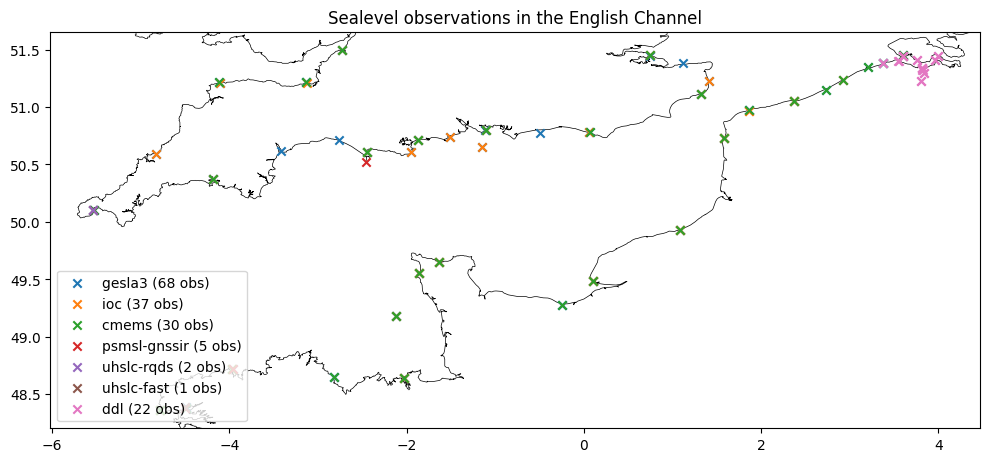

In [4]:
dir_output = "./sealevel_data_subset"
os.makedirs(dir_output, exist_ok=True)

lon_min, lon_max, lat_min, lat_max = -6, 4, 48, 51.5 # france
# lon_min, lon_max, lat_min, lat_max = 123, 148, 23, 47 # japan
# lon_min, lon_max, lat_min, lat_max = -20, 40, 25, 72 # europe
time_min, time_max = '2016-01-01','2016-02-01'

subset_kwargs = dict(lon_min=lon_min, lon_max=lon_max, lat_min=lat_min, lat_max=lat_max, 
                     time_min=time_min, time_max=time_max)
gesla_catalog_gpd_sel = dfmt.ssh_catalog_subset(source='gesla3', **subset_kwargs)
ioc_catalog_gpd_sel = dfmt.ssh_catalog_subset(source='ioc', **subset_kwargs)
cmems_list_gpd_sel = dfmt.ssh_catalog_subset(source='cmems', **subset_kwargs)
uhslc_json_rqds_sel = dfmt.ssh_catalog_subset(source='uhslc-rqds', **subset_kwargs)
uhslc_json_fast_sel = dfmt.ssh_catalog_subset(source='uhslc-fast', **subset_kwargs)
psmsl_gnssir_gpd_sel = dfmt.ssh_catalog_subset(source='psmsl-gnssir', **subset_kwargs)
# TODO: no time subsetting supported for ddl yet
for key in ["time_min", "time_max"]:
    subset_kwargs.pop(key)
ddl_gpd_sel = dfmt.ssh_catalog_subset(source='ddl', **subset_kwargs)
subset_gpd_list = [gesla_catalog_gpd_sel, ioc_catalog_gpd_sel,
                  cmems_list_gpd_sel, psmsl_gnssir_gpd_sel,
                  uhslc_json_rqds_sel, uhslc_json_fast_sel,
                  ddl_gpd_sel]

# plot stations
fig,ax = plt.subplots(figsize=(12,7))
for subset_gpd in subset_gpd_list:
    if subset_gpd.empty:
        continue
    source = subset_gpd.iloc[0]["source"]
    nstations = len(subset_gpd)
    subset_gpd.geometry.plot(ax=ax, marker="x", label=f"{source} ({nstations} obs)")
ax.legend(loc=3)
ax.set_title("Sealevel observations in the English Channel")
dfmt.plot_coastlines(ax=ax, min_area=1000, linewidth=0.5, zorder=0)


This data is retrieved with `dfmt.ssh_retrieve_data`. Since GESLA and IOC do not provide additional spatial coverage here, these datasets are skipped. DDL is skipped since retrieval is too slow.

In [5]:
# retrieve data (for all except gesla and ioc and ddl)
subset_gpd_list_retrieve = [cmems_list_gpd_sel, psmsl_gnssir_gpd_sel,
                            uhslc_json_rqds_sel, uhslc_json_fast_sel]
for subset_gpd in subset_gpd_list_retrieve:
    dfmt.ssh_retrieve_data(subset_gpd, dir_output,
                           time_min=time_min, time_max=time_max)


retrieving data for 30 cmems stations: 1 2 3 4 5 6 7 8 9 10 [NODATA] 11 12 13 [NODATA] 14 15 16 17 18 19 20 21 [NODATA] 22 23 24 25 26 27 28 29 30 
retrieving data for 5 psmsl-gnssir stations: 1 2 3 4 5 
retrieving data for 2 uhslc stations: 1 2 
retrieving data for 1 uhslc stations: 1 


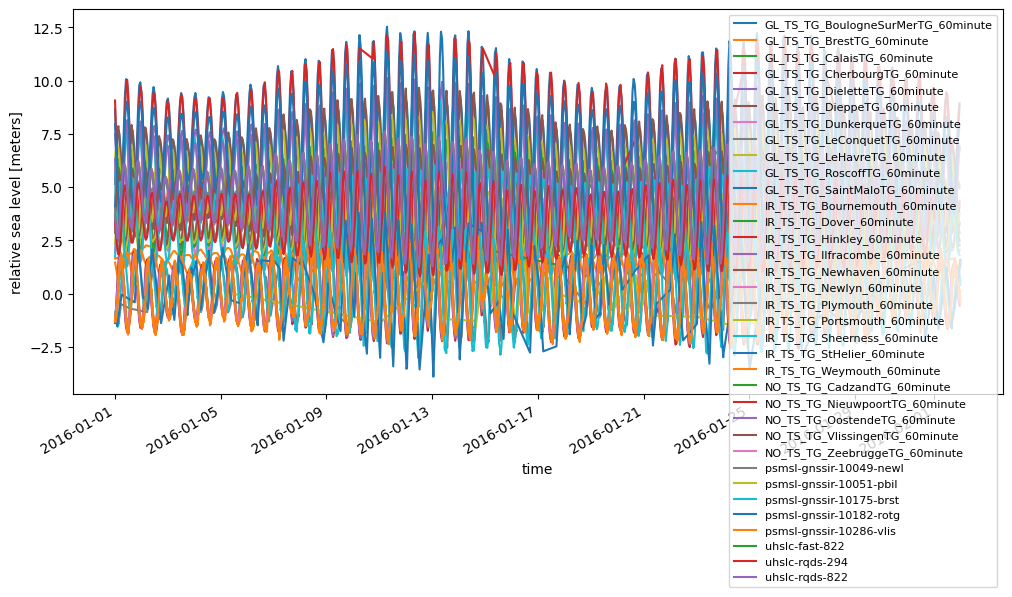

In [6]:
# plot the retrieved datasets
fig,ax = plt.subplots(figsize=(12,5))
file_list = glob.glob(os.path.join(dir_output, "*.nc"))
file_list.sort()
for file_nc in file_list:
    ds = xr.open_dataset(file_nc)
    station_name = os.path.basename(file_nc).strip(".nc")
    ds.waterlevel.plot(ax=ax, label=station_name)
    del ds
ax.legend(loc=1, fontsize=8)
